## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9778796	total: 59ms	remaining: 58.9s
1:	learn: 0.9574467	total: 59.9ms	remaining: 29.9s
2:	learn: 0.9375774	total: 61ms	remaining: 20.3s
3:	learn: 0.9217969	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9064180	total: 63ms	remaining: 12.5s
5:	learn: 0.8893286	total: 63.8ms	remaining: 10.6s
6:	learn: 0.8718931	total: 64.8ms	remaining: 9.19s
7:	learn: 0.8555860	total: 65.6ms	remaining: 8.14s
8:	learn: 0.8408740	total: 66.4ms	remaining: 7.31s
9:	learn: 0.8241312	total: 67.2ms	remaining: 6.65s
10:	learn: 0.8091343	total: 67.9ms	remaining: 6.11s
11:	learn: 0.7935730	total: 68.7ms	remaining: 5.66s
12:	learn: 0.7786659	total: 69.5ms	remaining: 5.28s
13:	learn: 0.7637351	total: 70.3ms	remaining: 4.95s
14:	learn: 0.7520976	total: 71.2ms	remaining: 4.67s
15:	learn: 0.7385620	total: 72.2ms	remaining: 4.44s
16:	learn: 0.7269443	total: 73ms	remaining: 4.22s
17:	learn: 0.7148038	total: 73.8ms	remaining: 4.03s
18:	learn: 0.7029796	total: 74.5ms	remaining: 3.85s


59:	learn: 0.4167611	total: 109ms	remaining: 1.7s
60:	learn: 0.4130985	total: 110ms	remaining: 1.69s
61:	learn: 0.4091745	total: 111ms	remaining: 1.67s
62:	learn: 0.4045267	total: 111ms	remaining: 1.66s
63:	learn: 0.4009224	total: 112ms	remaining: 1.64s
64:	learn: 0.3976601	total: 113ms	remaining: 1.63s
65:	learn: 0.3943306	total: 114ms	remaining: 1.61s
66:	learn: 0.3910169	total: 115ms	remaining: 1.59s
67:	learn: 0.3875785	total: 115ms	remaining: 1.58s
68:	learn: 0.3850726	total: 116ms	remaining: 1.57s
69:	learn: 0.3821752	total: 117ms	remaining: 1.56s
70:	learn: 0.3791843	total: 118ms	remaining: 1.55s
71:	learn: 0.3757491	total: 119ms	remaining: 1.53s
72:	learn: 0.3727213	total: 120ms	remaining: 1.52s
73:	learn: 0.3694196	total: 120ms	remaining: 1.51s
74:	learn: 0.3664621	total: 121ms	remaining: 1.49s
75:	learn: 0.3635312	total: 122ms	remaining: 1.48s
76:	learn: 0.3606765	total: 123ms	remaining: 1.47s
77:	learn: 0.3577680	total: 124ms	remaining: 1.46s
78:	learn: 0.3541947	total: 125m

154:	learn: 0.2468864	total: 192ms	remaining: 1.04s
155:	learn: 0.2460397	total: 193ms	remaining: 1.04s
156:	learn: 0.2451562	total: 193ms	remaining: 1.04s
157:	learn: 0.2440827	total: 194ms	remaining: 1.03s
158:	learn: 0.2432392	total: 195ms	remaining: 1.03s
159:	learn: 0.2425872	total: 196ms	remaining: 1.03s
160:	learn: 0.2419220	total: 197ms	remaining: 1.02s
161:	learn: 0.2410747	total: 197ms	remaining: 1.02s
162:	learn: 0.2402002	total: 198ms	remaining: 1.02s
163:	learn: 0.2394358	total: 199ms	remaining: 1.01s
164:	learn: 0.2389103	total: 200ms	remaining: 1.01s
165:	learn: 0.2380728	total: 200ms	remaining: 1.01s
166:	learn: 0.2374246	total: 201ms	remaining: 1s
167:	learn: 0.2362982	total: 202ms	remaining: 1s
168:	learn: 0.2357022	total: 203ms	remaining: 997ms
169:	learn: 0.2352101	total: 204ms	remaining: 995ms
170:	learn: 0.2345377	total: 205ms	remaining: 992ms
171:	learn: 0.2339167	total: 205ms	remaining: 989ms
172:	learn: 0.2333621	total: 206ms	remaining: 986ms
173:	learn: 0.2327

284:	learn: 0.1764844	total: 299ms	remaining: 749ms
285:	learn: 0.1758488	total: 300ms	remaining: 748ms
286:	learn: 0.1754967	total: 301ms	remaining: 747ms
287:	learn: 0.1751554	total: 302ms	remaining: 746ms
288:	learn: 0.1746761	total: 302ms	remaining: 744ms
289:	learn: 0.1742324	total: 303ms	remaining: 742ms
290:	learn: 0.1740604	total: 304ms	remaining: 741ms
291:	learn: 0.1738945	total: 305ms	remaining: 739ms
292:	learn: 0.1735667	total: 306ms	remaining: 738ms
293:	learn: 0.1730796	total: 307ms	remaining: 736ms
294:	learn: 0.1726769	total: 307ms	remaining: 735ms
295:	learn: 0.1723616	total: 308ms	remaining: 733ms
296:	learn: 0.1719708	total: 309ms	remaining: 732ms
297:	learn: 0.1715467	total: 311ms	remaining: 732ms
298:	learn: 0.1710695	total: 312ms	remaining: 730ms
299:	learn: 0.1706622	total: 312ms	remaining: 729ms
300:	learn: 0.1701802	total: 313ms	remaining: 727ms
301:	learn: 0.1700258	total: 314ms	remaining: 726ms
302:	learn: 0.1699350	total: 315ms	remaining: 724ms
303:	learn: 

379:	learn: 0.1439523	total: 382ms	remaining: 623ms
380:	learn: 0.1435530	total: 383ms	remaining: 622ms
381:	learn: 0.1432435	total: 383ms	remaining: 620ms
382:	learn: 0.1429054	total: 384ms	remaining: 619ms
383:	learn: 0.1424810	total: 385ms	remaining: 618ms
384:	learn: 0.1421536	total: 386ms	remaining: 617ms
385:	learn: 0.1418543	total: 387ms	remaining: 615ms
386:	learn: 0.1416365	total: 388ms	remaining: 614ms
387:	learn: 0.1414465	total: 388ms	remaining: 613ms
388:	learn: 0.1412655	total: 389ms	remaining: 612ms
389:	learn: 0.1411120	total: 390ms	remaining: 610ms
390:	learn: 0.1406886	total: 391ms	remaining: 609ms
391:	learn: 0.1402902	total: 392ms	remaining: 608ms
392:	learn: 0.1400327	total: 393ms	remaining: 606ms
393:	learn: 0.1396516	total: 393ms	remaining: 605ms
394:	learn: 0.1392965	total: 394ms	remaining: 604ms
395:	learn: 0.1391160	total: 395ms	remaining: 602ms
396:	learn: 0.1387579	total: 396ms	remaining: 601ms
397:	learn: 0.1384763	total: 397ms	remaining: 600ms
398:	learn: 

505:	learn: 0.1125988	total: 486ms	remaining: 474ms
506:	learn: 0.1123871	total: 487ms	remaining: 474ms
507:	learn: 0.1121548	total: 488ms	remaining: 473ms
508:	learn: 0.1118867	total: 489ms	remaining: 472ms
509:	learn: 0.1116983	total: 490ms	remaining: 471ms
510:	learn: 0.1113853	total: 491ms	remaining: 470ms
511:	learn: 0.1112124	total: 492ms	remaining: 469ms
512:	learn: 0.1109780	total: 493ms	remaining: 468ms
513:	learn: 0.1107902	total: 494ms	remaining: 467ms
514:	learn: 0.1104923	total: 495ms	remaining: 466ms
515:	learn: 0.1103629	total: 495ms	remaining: 465ms
516:	learn: 0.1101602	total: 496ms	remaining: 464ms
517:	learn: 0.1099637	total: 497ms	remaining: 462ms
518:	learn: 0.1098143	total: 498ms	remaining: 461ms
519:	learn: 0.1096446	total: 499ms	remaining: 460ms
520:	learn: 0.1094634	total: 500ms	remaining: 459ms
521:	learn: 0.1092561	total: 500ms	remaining: 458ms
522:	learn: 0.1091487	total: 501ms	remaining: 457ms
523:	learn: 0.1089712	total: 502ms	remaining: 456ms
524:	learn: 

568:	learn: 0.1008135	total: 541ms	remaining: 410ms
569:	learn: 0.1006046	total: 542ms	remaining: 409ms
570:	learn: 0.1004579	total: 543ms	remaining: 408ms
571:	learn: 0.1003243	total: 543ms	remaining: 407ms
572:	learn: 0.1002148	total: 544ms	remaining: 406ms
573:	learn: 0.1000116	total: 545ms	remaining: 404ms
574:	learn: 0.0997976	total: 546ms	remaining: 403ms
575:	learn: 0.0995596	total: 547ms	remaining: 402ms
576:	learn: 0.0993313	total: 547ms	remaining: 401ms
577:	learn: 0.0991647	total: 548ms	remaining: 400ms
578:	learn: 0.0990246	total: 549ms	remaining: 399ms
579:	learn: 0.0989001	total: 550ms	remaining: 398ms
580:	learn: 0.0987087	total: 551ms	remaining: 397ms
581:	learn: 0.0984812	total: 551ms	remaining: 396ms
582:	learn: 0.0983680	total: 552ms	remaining: 395ms
583:	learn: 0.0982099	total: 553ms	remaining: 394ms
584:	learn: 0.0981025	total: 554ms	remaining: 393ms
585:	learn: 0.0980221	total: 555ms	remaining: 392ms
586:	learn: 0.0978875	total: 555ms	remaining: 391ms
587:	learn: 

710:	learn: 0.0802061	total: 662ms	remaining: 269ms
711:	learn: 0.0800974	total: 662ms	remaining: 268ms
712:	learn: 0.0799436	total: 663ms	remaining: 267ms
713:	learn: 0.0797510	total: 664ms	remaining: 266ms
714:	learn: 0.0796299	total: 665ms	remaining: 265ms
715:	learn: 0.0795248	total: 666ms	remaining: 264ms
716:	learn: 0.0794549	total: 666ms	remaining: 263ms
717:	learn: 0.0792537	total: 667ms	remaining: 262ms
718:	learn: 0.0791359	total: 668ms	remaining: 261ms
719:	learn: 0.0790522	total: 669ms	remaining: 260ms
720:	learn: 0.0789500	total: 670ms	remaining: 259ms
721:	learn: 0.0787850	total: 671ms	remaining: 258ms
722:	learn: 0.0786347	total: 671ms	remaining: 257ms
723:	learn: 0.0785345	total: 672ms	remaining: 256ms
724:	learn: 0.0784763	total: 673ms	remaining: 255ms
725:	learn: 0.0783976	total: 674ms	remaining: 254ms
726:	learn: 0.0782584	total: 675ms	remaining: 253ms
727:	learn: 0.0781876	total: 676ms	remaining: 252ms
728:	learn: 0.0780571	total: 676ms	remaining: 251ms
729:	learn: 

795:	learn: 0.0710884	total: 731ms	remaining: 187ms
796:	learn: 0.0709599	total: 732ms	remaining: 186ms
797:	learn: 0.0708307	total: 733ms	remaining: 185ms
798:	learn: 0.0707412	total: 733ms	remaining: 185ms
799:	learn: 0.0706491	total: 734ms	remaining: 184ms
800:	learn: 0.0705464	total: 735ms	remaining: 183ms
801:	learn: 0.0704802	total: 736ms	remaining: 182ms
802:	learn: 0.0704597	total: 737ms	remaining: 181ms
803:	learn: 0.0703039	total: 737ms	remaining: 180ms
804:	learn: 0.0702506	total: 738ms	remaining: 179ms
805:	learn: 0.0701687	total: 739ms	remaining: 178ms
806:	learn: 0.0699848	total: 740ms	remaining: 177ms
807:	learn: 0.0698493	total: 741ms	remaining: 176ms
808:	learn: 0.0698319	total: 742ms	remaining: 175ms
809:	learn: 0.0697236	total: 742ms	remaining: 174ms
810:	learn: 0.0696090	total: 743ms	remaining: 173ms
811:	learn: 0.0695439	total: 744ms	remaining: 172ms
812:	learn: 0.0694848	total: 745ms	remaining: 171ms
813:	learn: 0.0694715	total: 746ms	remaining: 170ms
814:	learn: 

916:	learn: 0.0603562	total: 835ms	remaining: 75.6ms
917:	learn: 0.0602725	total: 836ms	remaining: 74.7ms
918:	learn: 0.0602357	total: 837ms	remaining: 73.8ms
919:	learn: 0.0601383	total: 838ms	remaining: 72.9ms
920:	learn: 0.0600541	total: 839ms	remaining: 71.9ms
921:	learn: 0.0599517	total: 839ms	remaining: 71ms
922:	learn: 0.0599435	total: 840ms	remaining: 70.1ms
923:	learn: 0.0598861	total: 841ms	remaining: 69.2ms
924:	learn: 0.0597939	total: 842ms	remaining: 68.3ms
925:	learn: 0.0597005	total: 843ms	remaining: 67.3ms
926:	learn: 0.0595712	total: 844ms	remaining: 66.5ms
927:	learn: 0.0595175	total: 845ms	remaining: 65.6ms
928:	learn: 0.0595072	total: 846ms	remaining: 64.6ms
929:	learn: 0.0594420	total: 847ms	remaining: 63.7ms
930:	learn: 0.0593800	total: 848ms	remaining: 62.8ms
931:	learn: 0.0592597	total: 848ms	remaining: 61.9ms
932:	learn: 0.0591650	total: 849ms	remaining: 61ms
933:	learn: 0.0590941	total: 850ms	remaining: 60.1ms
934:	learn: 0.0589760	total: 851ms	remaining: 59.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

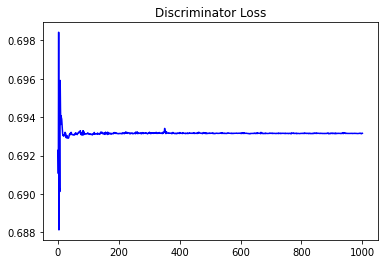

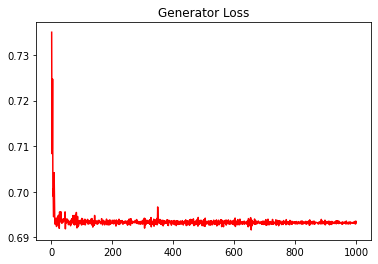

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15427539625644707


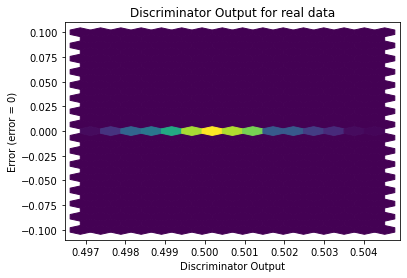

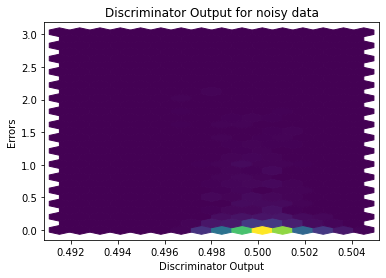

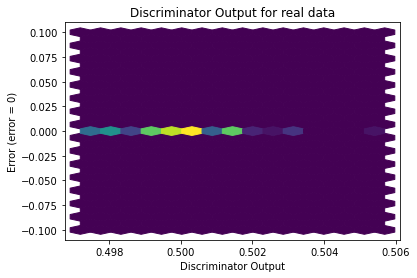

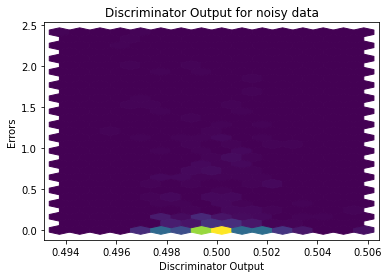

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


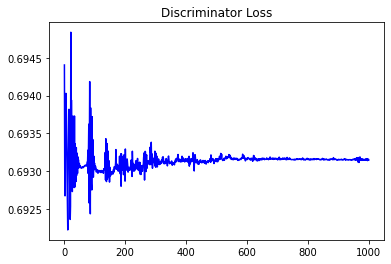

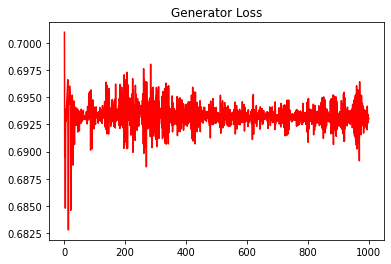

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1317759782543109


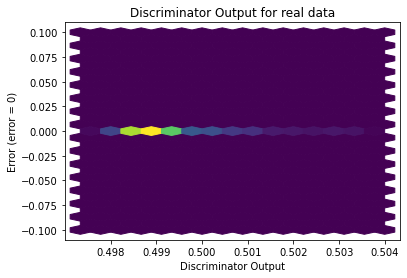

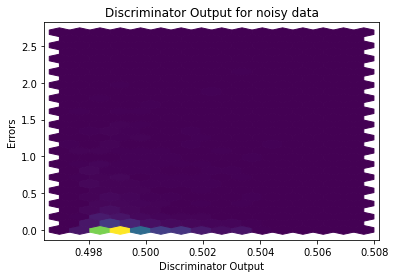

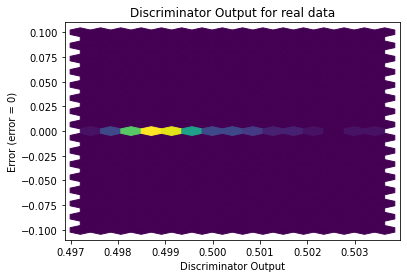

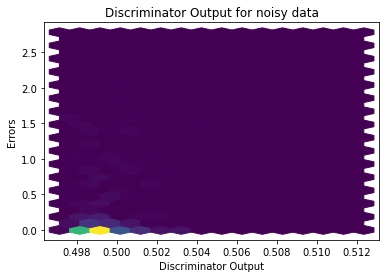

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0624]], requires_grad=True)
